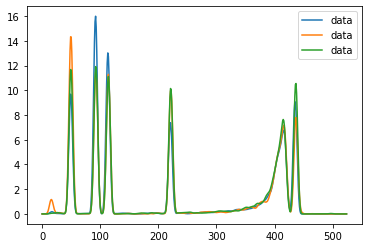

In [33]:
from os import walk
import mca
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import argrelmax

path = 'datafiles'
filenames = next(walk(path), (None, None, []))[2]
``
for filename in filenames:
    if filename.startswith("calibration") or filename.startswith("MCAlibration"):
        data = mca.extract_data(path + '/' + filename)
        channels = data['data']/data['meas_live']
        # rolling average
        channels = np.convolve(channels, np.hamming(15))
        # derivative = np.gradient(channels)
        plt.plot(channels, label='data')
        # zeroing everything below a certain threshold
        threshold = 4
        for i in range(len(channels)):
            if channels[i] < threshold:
                channels[i] = 0
# xs = np.arange(0, 500)
# print(pars)
# plt.plot(xs, pars[0]*xs + pars[1])
# plt.xlabel('Attentuation')
# plt.ylabel('Peak position (channel)')
plt.legend()
plt.show()

In [56]:
attenuation = [0.1, 0.2, 0.25, 0.5, 1]
peaks = np.array([[ 49, 92, 113, 221, 435], [ 49, 92, 114, 222, 437], [49, 92, 114, 221, 437]])
mean_channel = np.mean(peaks, axis=0)
channel_error = np.ones(5)
print(channel_error)

[1. 1. 1. 1. 1.]


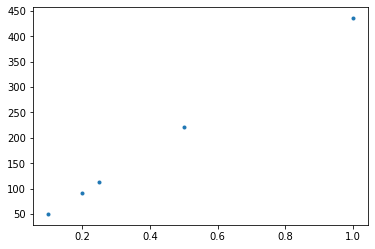

In [55]:
from scipy.optimize import curve_fit
pars, covs = curve_fit(lambda x, a, b: a*x + b, attenuation, mean_channel, sigma=channel_error)
plt.errorbar(attenuation, mean_channel, yerr=channel_error, fmt='.')
plt.show()

In [68]:
pars[1]
# covs[1][1]

6.009578539937767

$$\sigma_y^2 = y_2^2 \frac{(x-x_1)^2}{(x_2-x_1)^2}(\sigma_{x_1}^2 + \sigma_{x_2}^2)$$

σ_x1=0.006000351703899834
σ_x2=0.49


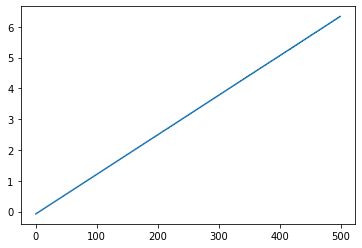

In [69]:
σ_x1 = 0.006000351703899834
σ_x2 = 0.49
x_1 = 6.009578539937767
y_1 = 0
x_2 = 418.60
y_2 = 5.3

def calibration(channel):
    return y_2*(channel - x_1)/(x_2 - x_1)

def sigma_E(channel):
    return np.sqrt(
        y_2**2 * (channel - x_1)**2 / (x_2 - x_1)**4
        * (σ_x1**2 + σ_x2**2)
        )

print(f'{σ_x1=}')
print(f'{σ_x2=}')

channels = np.arange(0, 500)
plt.errorbar(channels, calibration(channels), yerr=sigma_E(channels), label='calibration')
plt.show()